In [1]:
import time
from collections import namedtuple
try:
    from skimage import io as skimage_io
except:
    !pip install scikit-image
    from skimage import io as skimage_io
from self_fourier_shell_correlation import fsc_utils as fsc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Args = namedtuple("args", "input")
#args = Args("http://www.hpca.ual.es/~vruiz/images/barb.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/zelda.png")
#args = Args("http://www.hpca.ual.es/~vruiz/images/boats.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/cameraman.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/couple.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/crowd.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/house.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/lena_512x512_gray.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/mandrill.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/vacas.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/woman1.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/woman_darkhair.png")
args = Args("http://www.hpca.ual.es/~vruiz/images/lake.png")

#args = Args("barb.png")

In [3]:
x = skimage_io.imread(args.input)  # Ground Truth

In [4]:
r = x.shape[0] // 2
voxel = 1
freq = fsc.get_radial_spatial_frequencies(x, voxel, mode='full')
sfsc = np.mean(fsc.single_image_frc(x, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)
_, c_avg = fsc.get_SFRC_curve(x)

compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)
compute_fourier_shell_correlation.shape=(512, 256)
compute_fourier_shell_correlation.shape=(256, 512)


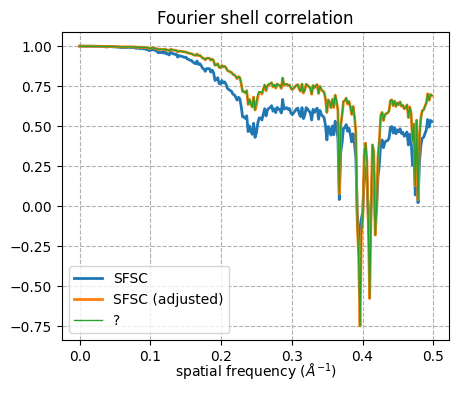

In [5]:
cmap_a = [plt.get_cmap('tab20c').colors[idx] for idx in [0, 4, 8, 12]]
cmap_b = [plt.get_cmap('tab20c').colors[idx] for idx in [2, 6, 10, 12]]
plt.figure(figsize=(5,4))
plt.plot(freq, sfsc, linewidth=2, label='SFSC')
plt.plot(freq, sfsc_adjusted, linewidth=2, label='SFSC (adjusted)')
plt.plot(freq, c_avg, linewidth=1, label='?')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()